In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Loading the Raw Data
df=pd.read_csv(r"E:\Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [97]:
# DataFrame Shape
df.shape

(10000, 14)

In [98]:
# Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [99]:
# Dataset Summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [100]:
# Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [101]:
# checking duplicates
df.duplicated().sum()

0

In [102]:
# Displaying Unique Value Counts for Each Feature  

sorted_columns = df.nunique().sort_values().index  # Sort columns by unique value count

for col in sorted_columns:
    unique_values = sorted(df[col].unique())  # Sort unique values
    num_unique = df[col].nunique()

    if num_unique <= 11:
        print(f"{col} (Unique Values: {num_unique}): {unique_values}")
    else:
        print(f"{col} (Total Unique Count): {num_unique}")

Gender (Unique Values: 2): ['Female', 'Male']
HasCrCard (Unique Values: 2): [0, 1]
IsActiveMember (Unique Values: 2): [0, 1]
Exited (Unique Values: 2): [0, 1]
Geography (Unique Values: 3): ['France', 'Germany', 'Spain']
NumOfProducts (Unique Values: 4): [1, 2, 3, 4]
Tenure (Unique Values: 11): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Age (Total Unique Count): 70
CreditScore (Total Unique Count): 460
Surname (Total Unique Count): 2932
Balance (Total Unique Count): 6382
EstimatedSalary (Total Unique Count): 9999
RowNumber (Total Unique Count): 10000
CustomerId (Total Unique Count): 10000


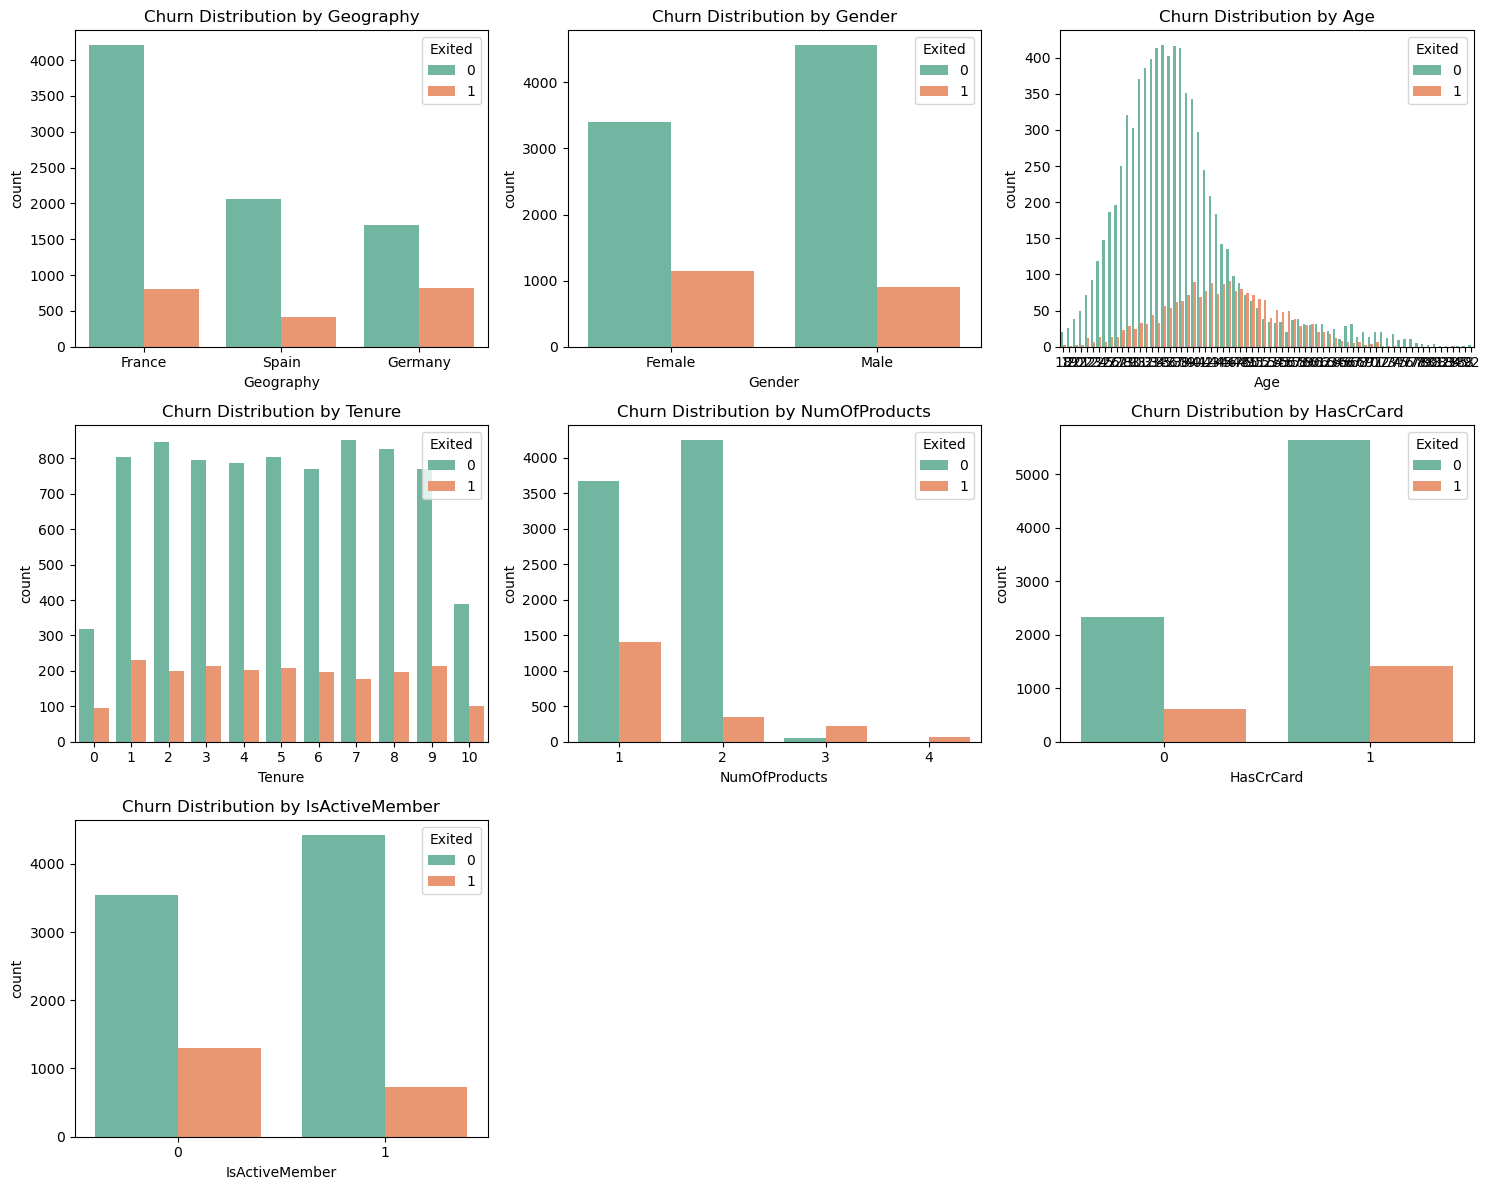

In [103]:
# Categorical Feature Distribution by Churn Status  

features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  
axes = axes.flatten()  

for i, f in enumerate(features):
    sns.countplot(x=f, data=df, hue='Exited', palette="Set2", ax=axes[i])
    axes[i].set_title(f"Churn Distribution by {f}")

# Hide empty subplots
for j in range(len(features), len(axes)):  
    fig.delaxes(axes[j])  

plt.tight_layout()  
plt.show()

The visualizations below represent the distribution of churned (Exited = 1) and retained (Exited = 0) customers across various features. 

- **Geography:** France has the most customers, but Spain shows a slightly higher churn rate.
- **Gender:** The churn rate is relatively similar between males and females.
- **Age:** Older customers show a higher churn rate.
- **Tenure:** No clear correlation with churn.
- **NumOfProducts:** Customers with fewer products are more likely to churn.
- **HasCrCard:** No strong relationship between credit card ownership and churn.
- **IsActiveMember:** Active members have a lower churn rate.

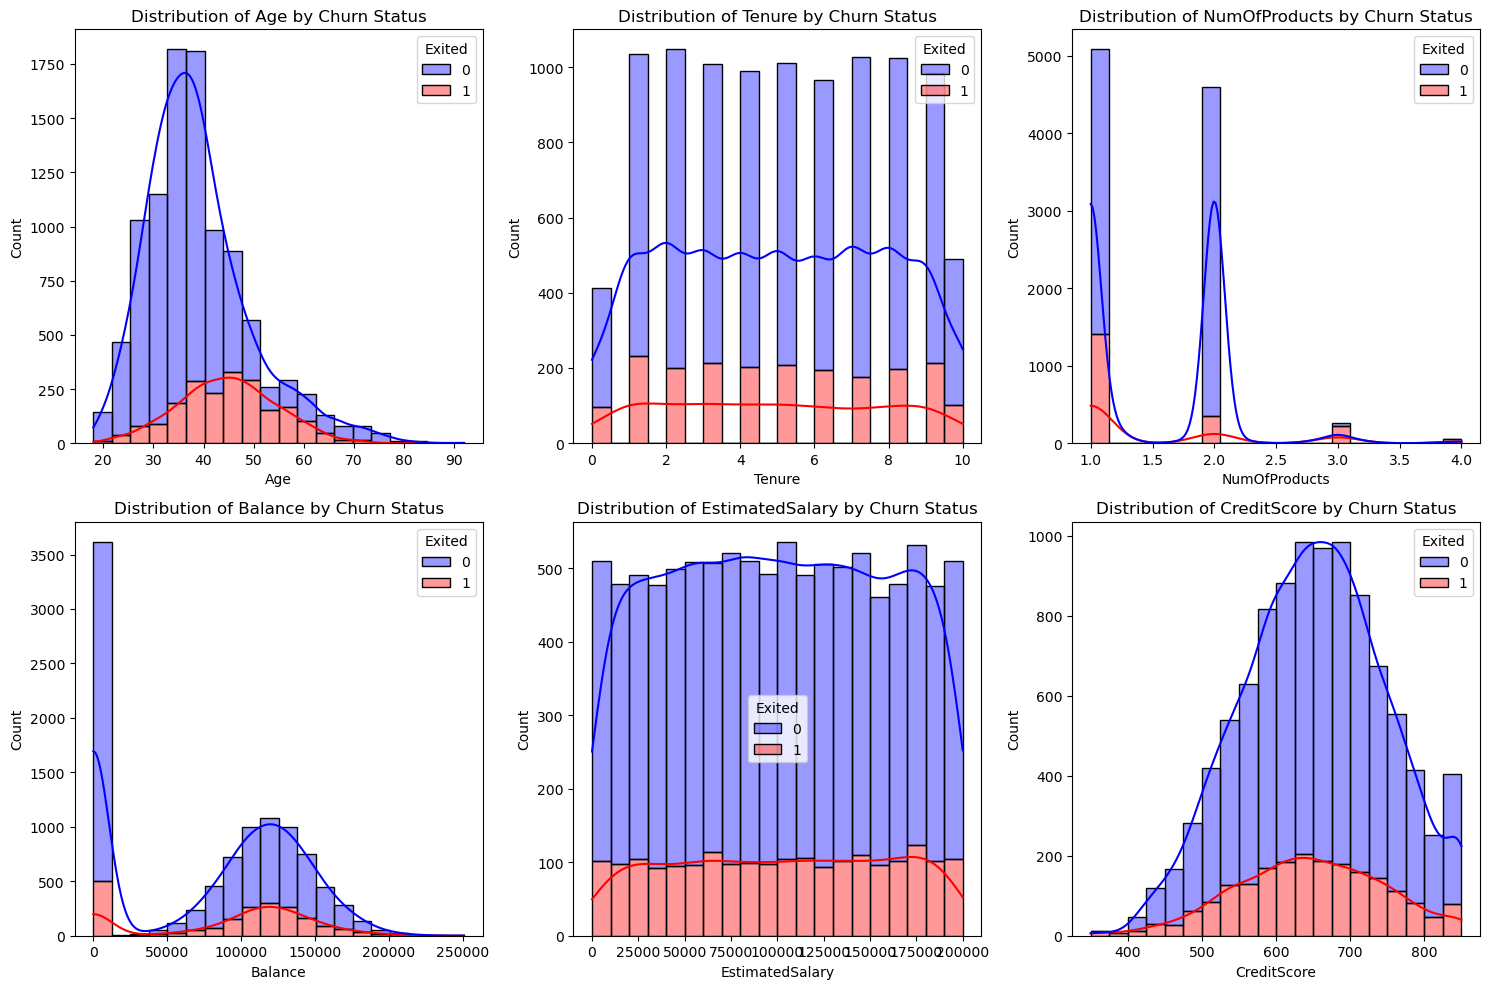

In [105]:
# Numerical Feature Distribution by Churn Status  
features = ['Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()

for i, f in enumerate(features):
    sns.histplot(data=df, x=f, bins=20, kde=True, hue="Exited", ax=axes[i], 
                 palette=["blue", "red"], multiple="stack", alpha=0.4)
    axes[i].set_title(f"Distribution of {f} by Churn Status")

plt.tight_layout()
plt.show()

### Distribution of Numerical Features by Churn Status
The following visualization shows the distribution of numerical features such as Age, Tenure, and Balance, grouped by churn status. 
- **Blue** represents customers who stayed.
- **Orange** represents customers who churned.
- The KDE curve shows the density of data distribution.


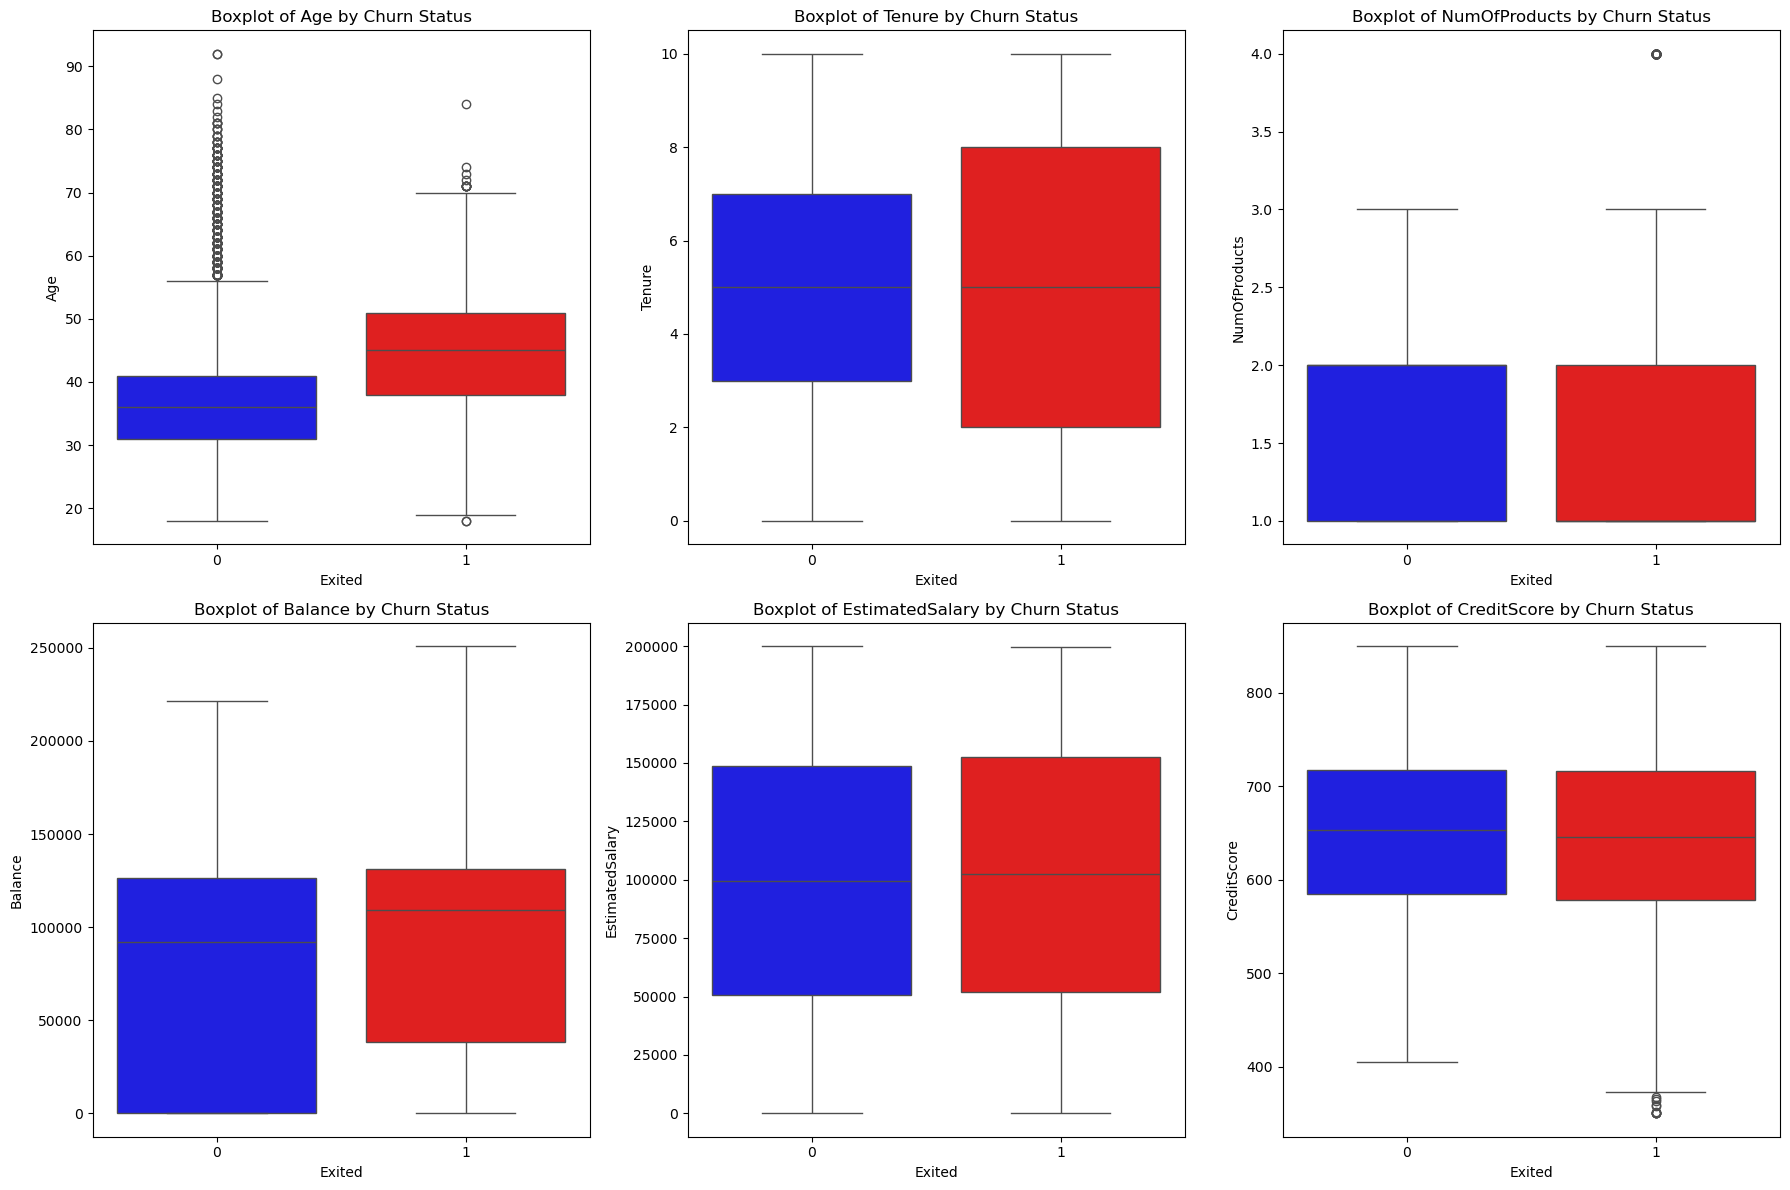

In [107]:
# Selecting all numeric features
features = ['Age', 'Tenure', 'NumOfProducts', 'Balance', 'EstimatedSalary', 'CreditScore']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  
axes = axes.flatten()  

# Plotting boxplots
for i, feature in enumerate(features):
    sns.boxplot(x='Exited', y=feature, data=df, ax=axes[i], palette=["blue", "red"])
    axes[i].set_title(f"Boxplot of {feature} by Churn Status")

# Adjusting layout
plt.tight_layout()
plt.show()


The boxplots display the distribution of key numerical features across churned (1) and non-churned (0) customers:

**Age**: Churned customers tend to be older.

**NumOfProducts**: Fewer products correlate with higher churn.

**Balance**: Churned customers show slightly higher balances.

**Tenure**, **Salary**, and **CreditScore**: No significant difference between churned and non-churned groups.

In [109]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-Hot Encoding with the updated parameter
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_features = encoder.fit_transform(df[["Geography", "Gender"]])

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["Geography", "Gender"]))

# Merge encoded columns with original data
df_encoded = df.join(encoded_df).drop(columns=["Geography", "Gender", "RowNumber", "Surname"])

# Apply MinMaxScaler on numerical columns
scale_vars = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = MinMaxScaler()
df_encoded[scale_vars] = scaler.fit_transform(df_encoded[scale_vars])

# Display first 5 rows
df_encoded.head(3)


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1.0,0.0,0.0,1.0,0.0
1,15647311,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.0,0.0,1.0,1.0,0.0
2,15619304,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.0,0.0,0.0,1.0,0.0


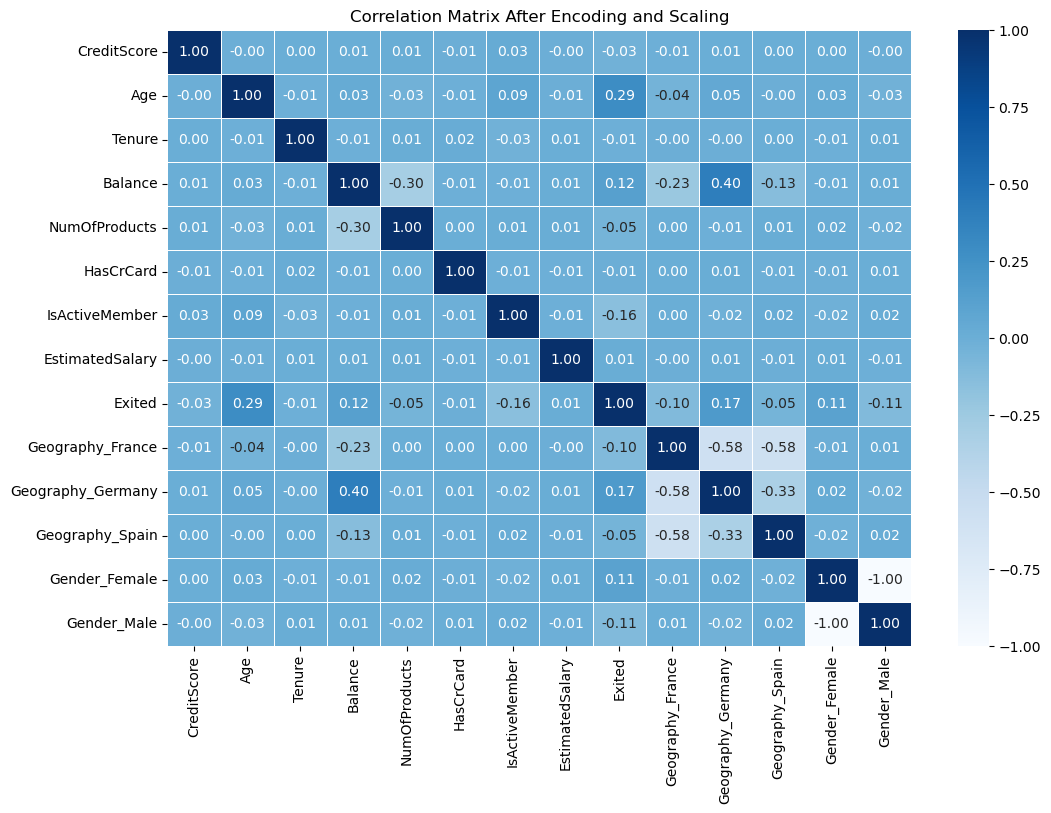

In [110]:
# Generate the correlation matrix
corr = df_encoded.drop("CustomerId",axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Matrix After Encoding and Scaling")
plt.show()

### Correlation Matrix After Encoding and Scaling
- The correlation matrix visualizes the relationship between features after applying **One-Hot Encoding** and **MinMax Scaling**.
- **Key Observations:**
  - The **Age** feature shows a **positive correlation** with churn, indicating that older customers are more likely to leave.
  - **Geography_Germany** shows a stronger correlation with churn compared to other geographical locations.
  - **Balance** and **NumOfProducts** have moderate correlations with churn.
  - The encoded gender variables (**Gender_Female** and **Gender_Male**) are perfectly negatively correlated, as expected due to one-hot encoding.  
- This correlation matrix helps in identifying **important features** for the model.


Exited
0    7963
1    2037
Name: Exited, dtype: int64


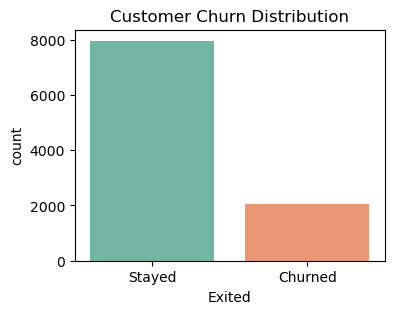

In [112]:
# Counts the number of customers who stayed vs churned
print(df.groupby('Exited')['Exited'].count())

# Visualizes the distribution of churned vs stayed customers
plt.figure(figsize=(4,3))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title("Customer Churn Distribution")
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()

###  Customer Churn Distribution  
- **Total Customers:** 10,000  
- **Stayed:** 7,963 (79.6%)  
- **Churned:** 2,037 (20.4%)  
- **Class Imbalance:** The dataset is imbalanced, with significantly more customers staying than churning.  


In [114]:
#Splitting the Dataset  
x=df_encoded.drop(columns=['Exited'])
y=df_encoded['Exited']

In [115]:
# Resampling--We know from the churn distribution plot that the dataset is imbalanced.  
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(x,y)

# Fix DataFrame & Series issue
x_res = pd.DataFrame(x_res, columns=x.columns)
y_res = pd.Series(y_res)
x_res.shape,y_res.shape

((15926, 14), (15926,))

In [116]:
# Splitting the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.25,random_state=42)

In [117]:
# Model Selection and Initialization
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 

# Define models
models={
 "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
}

# Evaluate performance
for name,model in models.items():
    print(f"Training {name}")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Although Random Forest achieved a slightly higher accuracy of 88.57%, XGBoost was chosen as the final model due to its superior performance in other key aspects. XGBoost offers better regularization techniques, which help prevent overfitting, making it more reliable for real-world predictions. It is also faster and more efficient in handling large datasets, making it suitable for scalable solutions. Additionally, XGBoost performs better on imbalanced data by optimizing the learning process, which enhances its predictive power. The model's greater flexibility for fine-tuning through hyperparameter adjustments also makes it more adaptable. Therefore, despite Random Forest's marginally higher accuracy, XGBoost was selected for its overall robustness and generalization capability.

In [120]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter grid
param_dist = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [3, 5, 7, 10],      # Maximum depth of a tree
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    "subsample": [0.6, 0.8, 1.0],    # Fraction of samples to grow trees
    "colsample_bytree": [0.6, 0.8, 1.0],  # Fraction of features for tree building
    "gamma": [0, 1, 5],              # Minimum loss reduction for split
    "scale_pos_weight": [1.0, 1.5, 2.0],  # Balances class imbalance (useful for imbalanced datasets)
    "min_child_weight": [1, 3, 5]    # Prevents overfitting by requiring a minimum sum of instance weights
}

# Set a fixed random state
xgb = XGBClassifier(random_state=42)

# Randomized Search with a fixed random state
random_search = RandomizedSearchCV(
    xgb, param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42
)

# Fit the model
random_search.fit(x_train, y_train)

# Print best parameters
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}
Best Accuracy: 0.9038845069916693


In [121]:
# Tuning withe best Perameter
from sklearn.metrics import confusion_matrix
# Initialize XGBoost with better parameters
xgb_best = XGBClassifier(subsample=0.8,scale_pos_weight=1.0, n_estimators=200,min_child_weight=5, max_depth=7, learning_rate=0.05,gamma=1,  colsample_bytree=0.8,  
    random_state=42)

# Train on full training data
xgb_best.fit(x_train, y_train)

# Predict on test data
y_pred = xgb_best.predict(x_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

# Classification Report
print("classification_report\n",classification_report(y_test, y_pred))

Test Accuracy: 0.91
Confusion Matrix
 [[1918  118]
 [ 247 1699]]
classification_report
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2036
           1       0.94      0.87      0.90      1946

    accuracy                           0.91      3982
   macro avg       0.91      0.91      0.91      3982
weighted avg       0.91      0.91      0.91      3982



In [122]:
#  XGBoost Model: Final Tuning with Optimized Parameters
xgb_final = XGBClassifier(subsample=0.5,scale_pos_weight=1.5, n_estimators=300,min_child_weight=5, max_depth=7, learning_rate=0.02,gamma=7,  
            colsample_bytree=1.0,random_state=42)

# Train on full training data
xgb_final.fit(x_train, y_train)

# Predict on test data
y_pred = xgb_final.predict(x_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

# Classification Report
print("classification_report\n",classification_report(y_test, y_pred))

Test Accuracy: 0.90
Confusion Matrix
 [[1835  201]
 [ 212 1734]]
classification_report
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2036
           1       0.90      0.89      0.89      1946

    accuracy                           0.90      3982
   macro avg       0.90      0.90      0.90      3982
weighted avg       0.90      0.90      0.90      3982



In [123]:
# Check Overfitting
# Predict on both training and test data
train_pred = xgb_final.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
accuracy_diff = train_accuracy - test_accuracy
print(f"Accuracy Difference: {accuracy_diff:.2f}")

if accuracy_diff > 0.05:
    print("Potential Overfitting: Training accuracy is significantly higher than test accuracy.")
else:
    print("No major overfitting detected: Model generalizes well.")

Training Accuracy: 0.91
Test Accuracy: 0.90
Accuracy Difference: 0.01
No major overfitting detected: Model generalizes well.


In [124]:
# Measuring Model Performance: AUC-ROC
from sklearn.metrics import roc_auc_score
y_prob = xgb_final.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.2f}")


AUC-ROC Score: 0.96


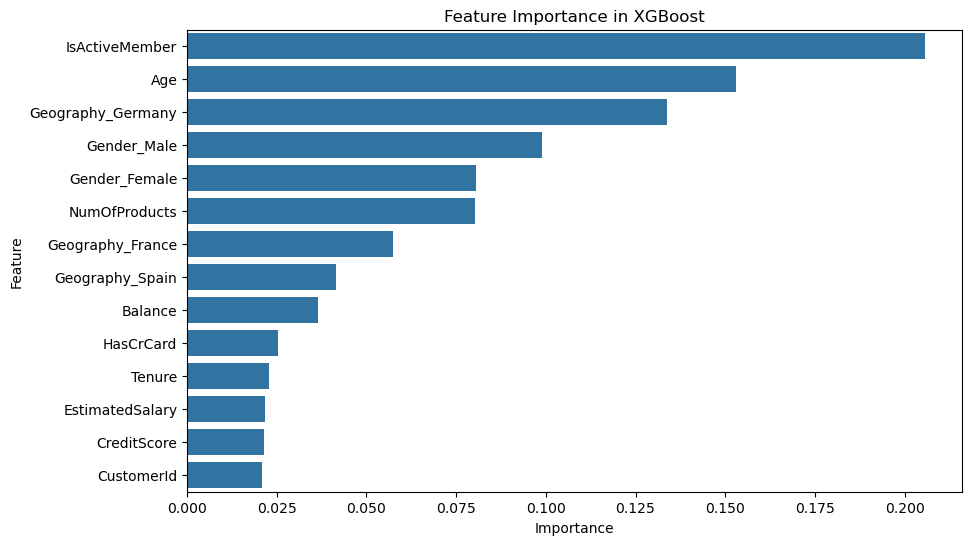

In [125]:
# Feature Importance Analysis
feature_importance = xgb_final.feature_importances_

# Create a DataFrame
feature_names = x_train.columns  # Assuming x_train is a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in XGBoost")
plt.show()

In [126]:
# Reverse Scaling before merging back
df_encoded[scale_vars] = scaler.inverse_transform(df_encoded[scale_vars])
df_encoded[scale_vars].head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619.0,42.0,2.0,0.00,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,113931.57


In [127]:
import joblib
# Save the trained XGBoost model
joblib.dump(xgb_final, "churn_model.pkl")
print("Model saved successfully!")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully!")

Model saved successfully!
Scaler saved successfully!


In [129]:
# Generate predictions
df_encoded["Predicted_Churn"] = xgb_final.predict(x)
df_encoded["Churn_Probability"] = xgb_final.predict_proba(x)[:, 1]

In [135]:
# Drop existing prediction columns (if they exist) to avoid duplicates
df = df.drop(columns=["Predicted_Churn", "Churn_Probability"], errors="ignore")

# Merge the latest predictions
df = df.merge(df_encoded[["CustomerId", "Predicted_Churn", "Churn_Probability"]], on="CustomerId", how="left")

df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted_Churn,Churn_Probability
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.483350
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.252659
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0.952821
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.092509
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.270585


In [139]:
# Export the dataset with predictions to a CSV file
df.to_csv("churn_prediction.csv", index=False)
print("File 'churn_prediction.csv' has been saved successfully!")

File 'churn_prediction.csv' has been saved successfully!


In [143]:
# Save feature importance to CSV
csv_filename = "feature_importance.csv"
importance_df.to_csv(csv_filename, index=False)
print(f"Saved: {csv_filename}")

Saved: feature_importance.csv
